## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  ucm
Please enter how many tweets to analyze:  1000


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  104
negative number:  112
neutral number:  784


In [6]:
tweet_list[0:20]

,0
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
1,RT @alaesterevista: 💙¡Nueva revista de Creació...
2,RT @UniversoAlex: Hubo muchas críticas hacia J...
3,@aosarmy @dampuero17 @brucebatman007 No están ...
4,Quelles sont les demandes des #PME au gvt 🇧🇪? ...
5,@JohnJokewriter @freshwaterpurl @sonjia_taylor...
6,RT @FiloSociedadUCM: Seminario Permanente de E...
7,Los amo personas con quien puedes ser tu versi...
8,RT @Peli_Comic: El UCM empezó hace 15 años. Yo...
9,RT @BComplutense: Inscríbete en el curso en lí...


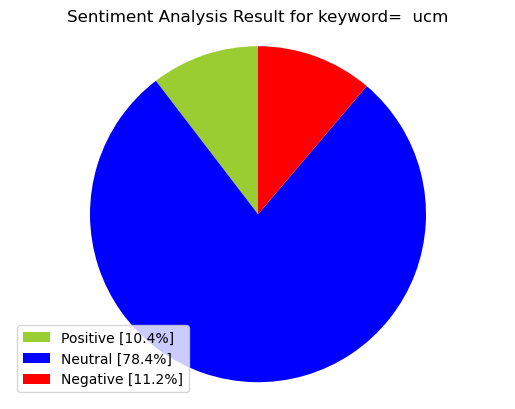

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
1,RT @alaesterevista: 💙¡Nueva revista de Creació...,RT @alaesterevista: 💙¡Nueva revista de Creació...
2,RT @UniversoAlex: Hubo muchas críticas hacia J...,RT @UniversoAlex: Hubo muchas críticas hacia J...
3,@aosarmy @dampuero17 @brucebatman007 No están ...,@aosarmy @dampuero17 @brucebatman007 No están ...
4,Quelles sont les demandes des #PME au gvt 🇧🇪? ...,Quelles sont les demandes des #PME au gvt 🇧🇪? ...
...,...,...
993,"RT @IIICIESC: Pariticipe do III CIESC. \n""GT 7...","RT @IIICIESC: Pariticipe do III CIESC. \n""GT 7..."
994,@kotchismo 2. El Erasmus no va por nota como t...,@kotchismo 2. El Erasmus no va por nota como t...
997,Excelente y magistral la conferencia impartida...,Excelente y magistral la conferencia impartida...
998,5. #IronMan también fue la primera película de...,5. #IronMan también fue la primera película de...


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,las brigadas t cnicas juveniles de la cmw t...
1,RT @alaesterevista: 💙¡Nueva revista de Creació...,nueva revista de creaci n literaria abri...
2,RT @UniversoAlex: Hubo muchas críticas hacia J...,hubo muchas cr ticas hacia james gunn cuando ...
3,@aosarmy @dampuero17 @brucebatman007 No están ...,no est n arruinando nada el ucm quiere ...
4,Quelles sont les demandes des #PME au gvt 🇧🇪? ...,quelles sont les demandes des pme au gvt ...
5,@JohnJokewriter @freshwaterpurl @sonjia_taylor...,taylor ucm
6,RT @FiloSociedadUCM: Seminario Permanente de E...,seminario permanente de estudios latinoameric...
7,Los amo personas con quien puedes ser tu versi...,los amo personas con quien puedes ser tu versi...
8,RT @Peli_Comic: El UCM empezó hace 15 años. Yo...,el ucm empez hace 15 a os yo ten a 13 a os ...
9,RT @BComplutense: Inscríbete en el curso en lí...,inscr bete en el curso en l nea sobre el port...


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_15870/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,las brigadas t cnicas juveniles de la cmw t...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
1,RT @alaesterevista: 💙¡Nueva revista de Creació...,nueva revista de creaci n literaria abri...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
2,RT @UniversoAlex: Hubo muchas críticas hacia J...,hubo muchas cr ticas hacia james gunn cuando ...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
3,@aosarmy @dampuero17 @brucebatman007 No están ...,no est n arruinando nada el ucm quiere ...,0.0,0.0,negative,0.167,0.833,0.000,-0.296
4,Quelles sont les demandes des #PME au gvt 🇧🇪? ...,quelles sont les demandes des pme au gvt ...,0.0,0.0,positive,0.000,0.872,0.128,0.296
5,@JohnJokewriter @freshwaterpurl @sonjia_taylor...,taylor ucm,0.0,0.0,neutral,0.000,1.000,0.000,0.000
6,RT @FiloSociedadUCM: Seminario Permanente de E...,seminario permanente de estudios latinoameric...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
7,Los amo personas con quien puedes ser tu versi...,los amo personas con quien puedes ser tu versi...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
8,RT @Peli_Comic: El UCM empezó hace 15 años. Yo...,el ucm empez hace 15 a os yo ten a 13 a os ...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
9,RT @BComplutense: Inscríbete en el curso en lí...,inscr bete en el curso en l nea sobre el port...,0.0,0.0,neutral,0.000,1.000,0.000,0.000


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,477,68.34
positive,112,16.05
negative,109,15.62


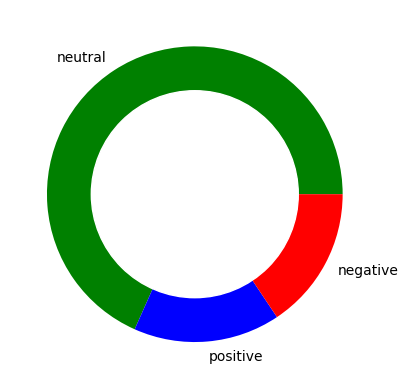

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



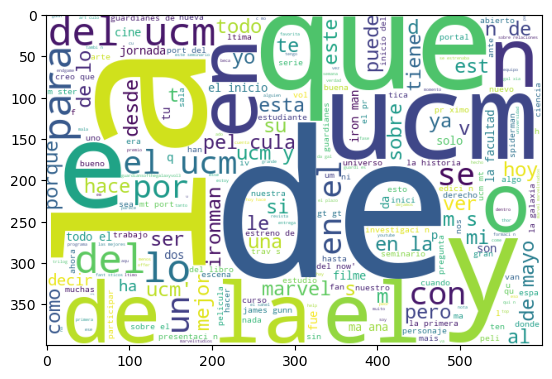

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

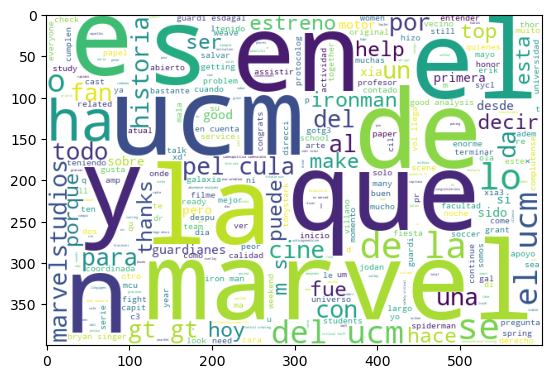

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

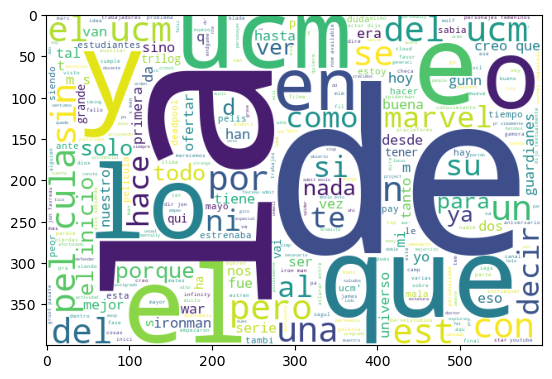

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

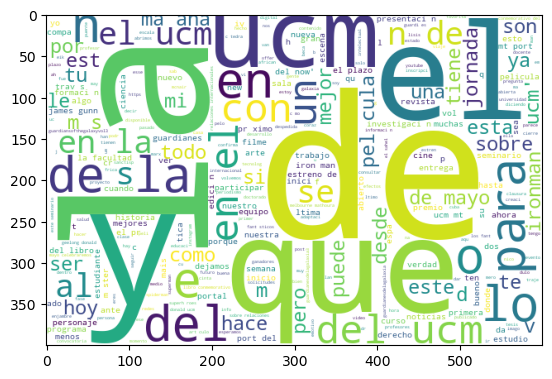

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)